In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#change filename here if necessary
filename = 'Desktop\AAPL (3).csv'

df = pd.read_csv(filename)

df.sort_values('Date')

df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
4517,2018-08-31,226.509995,228.869995,226.000000,227.630005,227.630005,43340100
4518,2018-09-04,228.410004,229.179993,226.630005,228.360001,228.360001,27390100
4519,2018-09-05,228.990005,229.669998,225.100006,226.869995,226.869995,33333000
4520,2018-09-06,226.229996,227.350006,221.300003,223.100006,223.100006,34290000
4521,2018-09-07,221.850006,225.369995,220.710007,221.300003,221.300003,37619800
4522,2018-09-10,220.949997,221.850006,216.470001,218.330002,218.330002,39516500
4523,2018-09-11,218.009995,224.300003,216.559998,223.850006,223.850006,35749000
4524,2018-09-12,224.940002,225.000000,219.839996,221.070007,221.070007,49278700
4525,2018-09-13,223.520004,228.350006,222.570007,226.410004,226.410004,41706400
4526,2018-09-14,225.750000,226.839996,222.520004,223.839996,223.839996,31902700


In [2]:
high_prices = df.loc[:,'High'].as_matrix()
low_prices = df.loc[:,'Low'].as_matrix()
open_prices = df.loc[:,'Open'].as_matrix()
close_prices = df.loc[:,'Close'].as_matrix()
OHLC_mean = (high_prices+low_prices+open_prices+close_prices)/4.0

print(OHLC_mean)

[  4.13783425   4.263393     4.29380375 ... 222.71250125 225.21250525
 224.737499  ]


C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [3]:
scaler = MinMaxScaler()
OHLC_mean_scaled = OHLC_mean.reshape(-1,1)
OHLC_mean_scaled = scaler.fit_transform(OHLC_mean_scaled)
train_data = OHLC_mean_scaled[:4400]



In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential

predictions = []

for step_size in range(1,121):
    X = OHLC_mean_scaled[:-step_size]
    Y = OHLC_mean_scaled[step_size:]

    trainX = X[:4400].reshape(-1, 1,1)
    trainY = Y[:4400]


    model = Sequential()
    model.add(LSTM(units=16, input_shape=(None, 1), return_sequences=True))
    model.add(LSTM(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile( loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, batch_size=32, epochs=100, verbose = 1)

    trainPredict = model.predict(trainX)
    last_val = trainPredict[-1]
    last_val_scaled = last_val/last_val
    next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
    next_val = last_val*next_val
    
    predictions.append(next_val)
    
print (predictions)


Using TensorFlow backend.


Epoch 1/100
4400/4400 [==============================] - 5s 1ms/step - loss: 0.0453
Epoch 2/100
4400/4400 [==============================] - 1s 252us/step - loss: 0.0043
Epoch 3/100
4400/4400 [==============================] - 1s 262us/step - loss: 1.0221e-04
Epoch 4/100
4400/4400 [==============================] - 1s 261us/step - loss: 4.8783e-05
Epoch 5/100
4400/4400 [==============================] - 1s 247us/step - loss: 3.1682e-05
Epoch 6/100
4400/4400 [==============================] - 1s 261us/step - loss: 2.5313e-05
Epoch 7/100
4400/4400 [==============================] - 1s 252us/step - loss: 2.3119e-05
Epoch 8/100
4400/4400 [==============================] - 1s 248us/step - loss: 2.2177e-05
Epoch 9/100
4400/4400 [==============================] - 1s 244us/step - loss: 2.1628e-05
Epoch 10/100
4400/4400 [==============================] - 1s 276us/step - loss: 2.0880e-05
Epoch 11/100
4400/4400 [==============================] - 1s 250us/step - loss: 2.0600e-05
Epoch 12/100
4400/

4400/4400 [==============================] - 1s 241us/step - loss: 3.7580e-05
Epoch 80/100
4400/4400 [==============================] - 1s 248us/step - loss: 3.8863e-05
Epoch 81/100
4400/4400 [==============================] - 1s 258us/step - loss: 3.8687e-05
Epoch 82/100
4400/4400 [==============================] - 1s 242us/step - loss: 3.7777e-05
Epoch 83/100
4400/4400 [==============================] - 1s 239us/step - loss: 4.0100e-05
Epoch 84/100
4400/4400 [==============================] - 1s 244us/step - loss: 3.9758e-05
Epoch 85/100
4400/4400 [==============================] - 1s 271us/step - loss: 3.9099e-05
Epoch 86/100
4400/4400 [==============================] - 1s 249us/step - loss: 3.7640e-05
Epoch 87/100
4400/4400 [==============================] - 1s 242us/step - loss: 3.7920e-05
Epoch 88/100
4400/4400 [==============================] - 1s 255us/step - loss: 3.8468e-05
Epoch 89/100
4400/4400 [==============================] - 1s 247us/step - loss: 3.8475e-05
Epoch 90/100

4400/4400 [==============================] - 1s 248us/step - loss: 6.0032e-05
Epoch 70/100
4400/4400 [==============================] - 1s 252us/step - loss: 5.8792e-05
Epoch 71/100
4400/4400 [==============================] - 1s 246us/step - loss: 6.0477e-05
Epoch 72/100
4400/4400 [==============================] - 1s 247us/step - loss: 6.2601e-05
Epoch 73/100
4400/4400 [==============================] - 1s 259us/step - loss: 5.8781e-05
Epoch 74/100
4400/4400 [==============================] - 1s 259us/step - loss: 5.8583e-05
Epoch 75/100
4400/4400 [==============================] - 1s 268us/step - loss: 6.0330e-05
Epoch 76/100
4400/4400 [==============================] - 1s 273us/step - loss: 5.7475e-05
Epoch 77/100
4400/4400 [==============================] - 1s 264us/step - loss: 6.1531e-05
Epoch 78/100
4400/4400 [==============================] - 1s 245us/step - loss: 5.8076e-05
Epoch 79/100
4400/4400 [==============================] - 1s 239us/step - loss: 5.7404e-05
Epoch 80/100

4400/4400 [==============================] - 1s 307us/step - loss: 1.0062e-04
Epoch 50/100
4400/4400 [==============================] - 2s 546us/step - loss: 9.8308e-05
Epoch 51/100
4400/4400 [==============================] - 2s 444us/step - loss: 9.9753e-05
Epoch 52/100
4400/4400 [==============================] - 2s 379us/step - loss: 1.0059e-04
Epoch 53/100
4400/4400 [==============================] - 1s 329us/step - loss: 1.0228e-04
Epoch 54/100
4400/4400 [==============================] - 1s 323us/step - loss: 1.0397e-04
Epoch 55/100
4400/4400 [==============================] - 2s 376us/step - loss: 9.7888e-05
Epoch 56/100
4400/4400 [==============================] - 2s 392us/step - loss: 9.7322e-05
Epoch 57/100
4400/4400 [==============================] - 2s 394us/step - loss: 1.0017e-04
Epoch 58/100
4400/4400 [==============================] - 1s 324us/step - loss: 9.9207e-05
Epoch 59/100
4400/4400 [==============================] - 1s 295us/step - loss: 1.0241e-04
Epoch 60/100

Epoch 39/100
4400/4400 [==============================] - 1s 275us/step - loss: 1.2435e-04
Epoch 40/100
4400/4400 [==============================] - 1s 258us/step - loss: 1.2295e-04
Epoch 41/100
4400/4400 [==============================] - 1s 264us/step - loss: 1.2112e-04
Epoch 42/100
4400/4400 [==============================] - 1s 283us/step - loss: 1.2290e-04
Epoch 43/100
4400/4400 [==============================] - ETA: 0s - loss: 1.2380e-0 - 1s 337us/step - loss: 1.2367e-04
Epoch 44/100
4400/4400 [==============================] - 1s 302us/step - loss: 1.2039e-04
Epoch 45/100
4400/4400 [==============================] - 1s 292us/step - loss: 1.1972e-04
Epoch 46/100
4400/4400 [==============================] - 1s 299us/step - loss: 1.2225e-04
Epoch 47/100
4400/4400 [==============================] - 1s 289us/step - loss: 1.2141e-04
Epoch 48/100
4400/4400 [==============================] - 1s 284us/step - loss: 1.2549e-04
Epoch 49/100
4400/4400 [==============================] - 1s 2

4400/4400 [==============================] - 1s 251us/step - loss: 1.6157e-04
Epoch 19/100
4400/4400 [==============================] - 1s 264us/step - loss: 1.6414e-04
Epoch 20/100
4400/4400 [==============================] - 1s 250us/step - loss: 1.6157e-04
Epoch 21/100
4400/4400 [==============================] - 1s 252us/step - loss: 1.6190e-04
Epoch 22/100
4400/4400 [==============================] - 1s 261us/step - loss: 1.6581e-04
Epoch 23/100
4400/4400 [==============================] - 1s 273us/step - loss: 1.6198e-04
Epoch 24/100
4400/4400 [==============================] - 1s 254us/step - loss: 1.5789e-04
Epoch 25/100
4400/4400 [==============================] - 1s 252us/step - loss: 1.5769e-04
Epoch 26/100
4400/4400 [==============================] - 1s 266us/step - loss: 1.6300e-04
Epoch 27/100
4400/4400 [==============================] - 1s 254us/step - loss: 1.6303e-04
Epoch 28/100
4400/4400 [==============================] - 1s 253us/step - loss: 1.5833e-04
Epoch 29/100

4400/4400 [==============================] - 1s 272us/step - loss: 1.8094e-04 1s 
Epoch 98/100
4400/4400 [==============================] - 1s 257us/step - loss: 1.8043e-04
Epoch 99/100
4400/4400 [==============================] - 1s 260us/step - loss: 1.8120e-04
Epoch 100/100
4400/4400 [==============================] - 1s 269us/step - loss: 1.8245e-04
Epoch 1/100
4400/4400 [==============================] - 3s 782us/step - loss: 0.0451
Epoch 2/100
4400/4400 [==============================] - 1s 276us/step - loss: 0.0056
Epoch 3/100
4400/4400 [==============================] - 1s 255us/step - loss: 3.6619e-04
Epoch 4/100
4400/4400 [==============================] - 1s 259us/step - loss: 2.6913e-04
Epoch 5/100
4400/4400 [==============================] - 1s 267us/step - loss: 2.2296e-04
Epoch 6/100
4400/4400 [==============================] - 1s 288us/step - loss: 2.1228e-04
Epoch 7/100
4400/4400 [==============================] - 1s 268us/step - loss: 2.0862e-04
Epoch 8/100
4400/4400 

4400/4400 [==============================] - 1s 269us/step - loss: 2.1875e-04
Epoch 78/100
4400/4400 [==============================] - 1s 256us/step - loss: 2.1963e-04
Epoch 79/100
4400/4400 [==============================] - 1s 273us/step - loss: 2.1947e-04
Epoch 80/100
4400/4400 [==============================] - 1s 259us/step - loss: 2.2768e-04
Epoch 81/100
4400/4400 [==============================] - 1s 255us/step - loss: 2.2203e-04
Epoch 82/100
4400/4400 [==============================] - 1s 260us/step - loss: 2.2069e-04
Epoch 83/100
4400/4400 [==============================] - 1s 262us/step - loss: 2.2214e-04
Epoch 84/100
4400/4400 [==============================] - 1s 264us/step - loss: 2.1826e-04
Epoch 85/100
4400/4400 [==============================] - 1s 265us/step - loss: 2.2236e-04
Epoch 86/100
4400/4400 [==============================] - 1s 272us/step - loss: 2.2303e-04
Epoch 87/100
4400/4400 [==============================] - 1s 258us/step - loss: 2.2338e-04
Epoch 88/100

4400/4400 [==============================] - 1s 285us/step - loss: 2.6385e-04
Epoch 58/100
4400/4400 [==============================] - 1s 259us/step - loss: 2.5938e-04
Epoch 59/100
4400/4400 [==============================] - 1s 255us/step - loss: 2.6090e-04
Epoch 60/100
4400/4400 [==============================] - 1s 270us/step - loss: 2.6398e-04
Epoch 61/100
4400/4400 [==============================] - 1s 252us/step - loss: 2.6613e-04
Epoch 62/100
4400/4400 [==============================] - 1s 254us/step - loss: 2.6305e-04
Epoch 63/100
4400/4400 [==============================] - 1s 253us/step - loss: 2.6258e-04
Epoch 64/100
4400/4400 [==============================] - 1s 258us/step - loss: 2.6009e-04
Epoch 65/100
4400/4400 [==============================] - 1s 250us/step - loss: 2.5667e-04
Epoch 66/100
4400/4400 [==============================] - 1s 253us/step - loss: 2.6670e-04
Epoch 67/100
4400/4400 [==============================] - 1s 266us/step - loss: 2.5724e-04
Epoch 68/100

4400/4400 [==============================] - 1s 257us/step - loss: 2.8137e-04
Epoch 48/100
4400/4400 [==============================] - 1s 260us/step - loss: 2.8187e-04
Epoch 49/100
4400/4400 [==============================] - 1s 295us/step - loss: 2.7606e-04
Epoch 50/100
4400/4400 [==============================] - 1s 263us/step - loss: 2.8389e-04
Epoch 51/100
4400/4400 [==============================] - 1s 264us/step - loss: 2.8156e-04
Epoch 52/100
4400/4400 [==============================] - 1s 273us/step - loss: 2.7840e-04
Epoch 53/100
4400/4400 [==============================] - 1s 260us/step - loss: 2.8851e-04
Epoch 54/100
4400/4400 [==============================] - 1s 260us/step - loss: 2.7717e-04
Epoch 55/100
4400/4400 [==============================] - 1s 257us/step - loss: 2.7650e-04
Epoch 56/100
4400/4400 [==============================] - 1s 261us/step - loss: 2.7806e-04
Epoch 57/100
4400/4400 [==============================] - 1s 257us/step - loss: 2.7878e-04
Epoch 58/100

4400/4400 [==============================] - 1s 262us/step - loss: 3.1740e-04
Epoch 28/100
4400/4400 [==============================] - 1s 272us/step - loss: 3.1684e-04
Epoch 29/100
4400/4400 [==============================] - 1s 291us/step - loss: 3.2877e-04
Epoch 30/100
4400/4400 [==============================] - 1s 259us/step - loss: 3.2464e-04
Epoch 31/100
4400/4400 [==============================] - 1s 262us/step - loss: 3.2079e-04
Epoch 32/100
4400/4400 [==============================] - 1s 281us/step - loss: 3.1585e-04
Epoch 33/100
4400/4400 [==============================] - 1s 259us/step - loss: 3.1489e-04
Epoch 34/100
4400/4400 [==============================] - 1s 258us/step - loss: 3.1364e-04
Epoch 35/100
4400/4400 [==============================] - 1s 264us/step - loss: 3.1866e-04
Epoch 36/100
4400/4400 [==============================] - 1s 257us/step - loss: 3.2064e-04
Epoch 37/100
4400/4400 [==============================] - 1s 258us/step - loss: 3.2199e-04
Epoch 38/100

4400/4400 [==============================] - 1s 268us/step - loss: 3.7263e-04
Epoch 8/100
4400/4400 [==============================] - 1s 292us/step - loss: 3.7059e-04
Epoch 9/100
4400/4400 [==============================] - 1s 261us/step - loss: 3.6646e-04
Epoch 10/100
4400/4400 [==============================] - 1s 265us/step - loss: 3.6583e-04
Epoch 11/100
4400/4400 [==============================] - 1s 286us/step - loss: 3.6402e-04
Epoch 12/100
4400/4400 [==============================] - 1s 269us/step - loss: 3.6307e-04
Epoch 13/100
4400/4400 [==============================] - 1s 263us/step - loss: 3.6758e-04
Epoch 14/100
4400/4400 [==============================] - 1s 272us/step - loss: 3.7099e-04
Epoch 15/100
4400/4400 [==============================] - 1s 274us/step - loss: 3.6333e-04 
Epoch 16/100
4400/4400 [==============================] - 1s 271us/step - loss: 3.6531e-04
Epoch 17/100
4400/4400 [==============================] - 1s 272us/step - loss: 3.6836e-04
Epoch 18/100


4400/4400 [==============================] - 1s 270us/step - loss: 3.8665e-04
Epoch 88/100
4400/4400 [==============================] - 1s 316us/step - loss: 3.8418e-04
Epoch 89/100
4400/4400 [==============================] - 2s 349us/step - loss: 3.7736e-04
Epoch 90/100
4400/4400 [==============================] - 1s 340us/step - loss: 3.8721e-04
Epoch 91/100
4400/4400 [==============================] - 1s 328us/step - loss: 3.7740e-04
Epoch 92/100
4400/4400 [==============================] - 1s 289us/step - loss: 3.8095e-04
Epoch 93/100
4400/4400 [==============================] - 1s 307us/step - loss: 3.8361e-04
Epoch 94/100
4400/4400 [==============================] - 1s 321us/step - loss: 3.7620e-04
Epoch 95/100
4400/4400 [==============================] - 1s 280us/step - loss: 3.7607e-04
Epoch 96/100
4400/4400 [==============================] - 1s 325us/step - loss: 3.8020e-04
Epoch 97/100
4400/4400 [==============================] - 1s 295us/step - loss: 3.7387e-04
Epoch 98/100

Epoch 67/100
4400/4400 [==============================] - 1s 281us/step - loss: 4.1857e-04
Epoch 68/100
4400/4400 [==============================] - 1s 287us/step - loss: 4.1159e-04
Epoch 69/100
4400/4400 [==============================] - 1s 277us/step - loss: 4.2373e-04
Epoch 70/100
4400/4400 [==============================] - 1s 274us/step - loss: 4.1011e-04
Epoch 71/100
4400/4400 [==============================] - 1s 275us/step - loss: 4.2190e-04
Epoch 72/100
4400/4400 [==============================] - 1s 278us/step - loss: 4.1793e-04
Epoch 73/100
4400/4400 [==============================] - 1s 275us/step - loss: 4.1794e-04
Epoch 74/100
4400/4400 [==============================] - 1s 295us/step - loss: 4.1699e-04
Epoch 75/100
4400/4400 [==============================] - 1s 279us/step - loss: 4.1434e-04
Epoch 76/100
4400/4400 [==============================] - 1s 282us/step - loss: 4.0945e-04
Epoch 77/100
4400/4400 [==============================] - 1s 289us/step - loss: 4.2990e-04

4400/4400 [==============================] - 1s 272us/step - loss: 4.6733e-04
Epoch 47/100
4400/4400 [==============================] - 1s 284us/step - loss: 4.6930e-04
Epoch 48/100
4400/4400 [==============================] - 1s 271us/step - loss: 4.6518e-04
Epoch 49/100
4400/4400 [==============================] - 1s 272us/step - loss: 4.6739e-04
Epoch 50/100
4400/4400 [==============================] - 1s 271us/step - loss: 4.6914e-04
Epoch 51/100
4400/4400 [==============================] - 1s 268us/step - loss: 4.7081e-04
Epoch 52/100
4400/4400 [==============================] - 1s 278us/step - loss: 4.7640e-04
Epoch 53/100
4400/4400 [==============================] - 1s 297us/step - loss: 4.6927e-04
Epoch 54/100
4400/4400 [==============================] - 1s 277us/step - loss: 4.7015e-04
Epoch 55/100
4400/4400 [==============================] - 1s 278us/step - loss: 4.7030e-04
Epoch 56/100
4400/4400 [==============================] - 1s 279us/step - loss: 4.6945e-04
Epoch 57/100

4400/4400 [==============================] - 1s 286us/step - loss: 5.1867e-04
Epoch 27/100
4400/4400 [==============================] - 1s 293us/step - loss: 5.0118e-04
Epoch 28/100
4400/4400 [==============================] - 1s 328us/step - loss: 5.0750e-04
Epoch 29/100
4400/4400 [==============================] - 1s 290us/step - loss: 5.1812e-04
Epoch 30/100
4400/4400 [==============================] - 1s 279us/step - loss: 5.0479e-04
Epoch 31/100
4400/4400 [==============================] - 1s 272us/step - loss: 5.0726e-04
Epoch 32/100
4400/4400 [==============================] - 1s 275us/step - loss: 5.0564e-04
Epoch 33/100
4400/4400 [==============================] - 1s 294us/step - loss: 5.0320e-04
Epoch 34/100
4400/4400 [==============================] - 1s 273us/step - loss: 5.0959e-04
Epoch 35/100
4400/4400 [==============================] - 1s 271us/step - loss: 5.1096e-04
Epoch 36/100
4400/4400 [==============================] - 1s 292us/step - loss: 5.1386e-04
Epoch 37/100

4400/4400 [==============================] - 2s 365us/step - loss: 5.3844e-04
Epoch 6/100
4400/4400 [==============================] - 2s 356us/step - loss: 5.3790e-04
Epoch 7/100
4400/4400 [==============================] - 1s 320us/step - loss: 5.3520e-04
Epoch 8/100
4400/4400 [==============================] - 2s 350us/step - loss: 5.3543e-04
Epoch 9/100
4400/4400 [==============================] - 2s 359us/step - loss: 5.3718e-04
Epoch 10/100
4400/4400 [==============================] - 1s 326us/step - loss: 5.3408e-04
Epoch 11/100
4400/4400 [==============================] - 2s 343us/step - loss: 5.3956e-04
Epoch 12/100
4400/4400 [==============================] - 1s 339us/step - loss: 5.3907e-04
Epoch 13/100
4400/4400 [==============================] - 2s 367us/step - loss: 5.4257e-04
Epoch 14/100
4400/4400 [==============================] - 1s 297us/step - loss: 5.4824e-04
Epoch 15/100
4400/4400 [==============================] - 1s 294us/step - loss: 5.3716e-04
Epoch 16/100
440

4400/4400 [==============================] - 1s 299us/step - loss: 5.4752e-04
Epoch 86/100
4400/4400 [==============================] - 1s 291us/step - loss: 5.5240e-04
Epoch 87/100
4400/4400 [==============================] - 1s 315us/step - loss: 5.4928e-04
Epoch 88/100
4400/4400 [==============================] - 1s 316us/step - loss: 5.4983e-04
Epoch 89/100
4400/4400 [==============================] - 1s 301us/step - loss: 5.5400e-04
Epoch 90/100
4400/4400 [==============================] - 1s 313us/step - loss: 5.5714e-04
Epoch 91/100
4400/4400 [==============================] - 1s 299us/step - loss: 5.5390e-04
Epoch 92/100
4400/4400 [==============================] - 1s 295us/step - loss: 5.6312e-04
Epoch 93/100
4400/4400 [==============================] - 1s 297us/step - loss: 5.5234e-04
Epoch 94/100
4400/4400 [==============================] - 1s 303us/step - loss: 5.4907e-04
Epoch 95/100
4400/4400 [==============================] - 1s 295us/step - loss: 5.5271e-04
Epoch 96/100

4400/4400 [==============================] - 1s 310us/step - loss: 6.0367e-04
Epoch 65/100
4400/4400 [==============================] - 1s 327us/step - loss: 6.0797e-04
Epoch 66/100
4400/4400 [==============================] - 1s 297us/step - loss: 5.9553e-04
Epoch 67/100
4400/4400 [==============================] - 1s 297us/step - loss: 6.0130e-04
Epoch 68/100
4400/4400 [==============================] - 1s 306us/step - loss: 5.9993e-04
Epoch 69/100
4400/4400 [==============================] - 1s 304us/step - loss: 6.0464e-04
Epoch 70/100
4400/4400 [==============================] - 1s 294us/step - loss: 6.0013e-04
Epoch 71/100
4400/4400 [==============================] - 2s 346us/step - loss: 5.9553e-04
Epoch 72/100
4400/4400 [==============================] - 1s 330us/step - loss: 6.0568e-04
Epoch 73/100
4400/4400 [==============================] - 1s 311us/step - loss: 6.0601e-04
Epoch 74/100
4400/4400 [==============================] - 2s 350us/step - loss: 6.0727e-04
Epoch 75/100

4400/4400 [==============================] - 1s 301us/step - loss: 6.4291e-04
Epoch 55/100
4400/4400 [==============================] - 1s 311us/step - loss: 6.2584e-04
Epoch 56/100
4400/4400 [==============================] - 1s 295us/step - loss: 6.2977e-04
Epoch 57/100
4400/4400 [==============================] - 1s 313us/step - loss: 6.1903e-04
Epoch 58/100
4400/4400 [==============================] - 1s 299us/step - loss: 6.2816e-04
Epoch 59/100
4400/4400 [==============================] - 1s 319us/step - loss: 6.2187e-04
Epoch 60/100
4400/4400 [==============================] - 1s 309us/step - loss: 6.2174e-04
Epoch 61/100
4400/4400 [==============================] - 1s 321us/step - loss: 6.2236e-04
Epoch 62/100
4400/4400 [==============================] - 1s 293us/step - loss: 6.2323e-04
Epoch 63/100
4400/4400 [==============================] - 1s 298us/step - loss: 6.3536e-04
Epoch 64/100
4400/4400 [==============================] - 1s 300us/step - loss: 6.2328e-04
Epoch 65/100

4400/4400 [==============================] - 1s 329us/step - loss: 6.4653e-04
Epoch 45/100
4400/4400 [==============================] - 1s 303us/step - loss: 6.3711e-04
Epoch 46/100
4400/4400 [==============================] - 1s 316us/step - loss: 6.4011e-04
Epoch 47/100
4400/4400 [==============================] - 1s 313us/step - loss: 6.2957e-04
Epoch 48/100
4400/4400 [==============================] - 1s 297us/step - loss: 6.3718e-04
Epoch 49/100
4400/4400 [==============================] - 1s 306us/step - loss: 6.3483e-04
Epoch 50/100
4400/4400 [==============================] - 1s 297us/step - loss: 6.2317e-04
Epoch 51/100
4400/4400 [==============================] - 1s 293us/step - loss: 6.2556e-04
Epoch 52/100
4400/4400 [==============================] - 1s 301us/step - loss: 6.2517e-04
Epoch 53/100
4400/4400 [==============================] - 1s 304us/step - loss: 6.3067e-04
Epoch 54/100
4400/4400 [==============================] - 1s 295us/step - loss: 6.2499e-04
Epoch 55/100

Epoch 34/100
4400/4400 [==============================] - 1s 301us/step - loss: 6.5607e-04
Epoch 35/100
4400/4400 [==============================] - 1s 296us/step - loss: 6.4988e-04
Epoch 36/100
4400/4400 [==============================] - 1s 298us/step - loss: 6.5649e-04
Epoch 37/100
4400/4400 [==============================] - 1s 337us/step - loss: 6.5537e-04
Epoch 38/100
4400/4400 [==============================] - 2s 363us/step - loss: 6.5704e-04
Epoch 39/100
4400/4400 [==============================] - 1s 310us/step - loss: 6.5007e-04
Epoch 40/100
4400/4400 [==============================] - 1s 309us/step - loss: 6.5434e-04
Epoch 41/100
4400/4400 [==============================] - 1s 324us/step - loss: 6.5794e-04
Epoch 42/100
4400/4400 [==============================] - 1s 315us/step - loss: 6.5040e-04
Epoch 43/100
4400/4400 [==============================] - 1s 322us/step - loss: 6.7413e-04
Epoch 44/100
4400/4400 [==============================] - 1s 307us/step - loss: 6.5330e-04

4400/4400 [==============================] - 1s 311us/step - loss: 7.0058e-04
Epoch 14/100
4400/4400 [==============================] - 1s 323us/step - loss: 7.0223e-04
Epoch 15/100
4400/4400 [==============================] - 1s 323us/step - loss: 6.9903e-04
Epoch 16/100
4400/4400 [==============================] - 1s 312us/step - loss: 7.0000e-04 0s - loss: 7.017
Epoch 17/100
4400/4400 [==============================] - 1s 304us/step - loss: 6.9628e-04
Epoch 18/100
4400/4400 [==============================] - 1s 326us/step - loss: 6.9329e-04
Epoch 19/100
4400/4400 [==============================] - 1s 319us/step - loss: 6.9623e-04
Epoch 20/100
4400/4400 [==============================] - 1s 317us/step - loss: 6.9808e-04
Epoch 21/100
4400/4400 [==============================] - 2s 345us/step - loss: 7.0188e-04
Epoch 22/100
4400/4400 [==============================] - 1s 319us/step - loss: 6.9730e-04
Epoch 23/100
4400/4400 [==============================] - 1s 338us/step - loss: 6.9709

Epoch 92/100
4400/4400 [==============================] - 1s 299us/step - loss: 7.0373e-04
Epoch 93/100
4400/4400 [==============================] - 1s 325us/step - loss: 7.1120e-04
Epoch 94/100
4400/4400 [==============================] - 1s 315us/step - loss: 7.1106e-04
Epoch 95/100
4400/4400 [==============================] - 1s 325us/step - loss: 7.1218e-04
Epoch 96/100
4400/4400 [==============================] - 1s 316us/step - loss: 7.2237e-04
Epoch 97/100
4400/4400 [==============================] - 1s 295us/step - loss: 7.1774e-04
Epoch 98/100
4400/4400 [==============================] - 1s 294us/step - loss: 7.2126e-04
Epoch 99/100
4400/4400 [==============================] - 2s 352us/step - loss: 7.0964e-04
Epoch 100/100
4400/4400 [==============================] - 1s 297us/step - loss: 7.1838e-04
Epoch 1/100
4400/4400 [==============================] - 8s 2ms/step - loss: 0.0489
Epoch 2/100
4400/4400 [==============================] - 2s 349us/step - loss: 0.0072
Epoch 3/10

4400/4400 [==============================] - 2s 341us/step - loss: 7.3996e-04
Epoch 83/100
4400/4400 [==============================] - 2s 353us/step - loss: 7.2262e-04
Epoch 84/100
4400/4400 [==============================] - 2s 368us/step - loss: 7.2710e-04
Epoch 85/100
4400/4400 [==============================] - 2s 366us/step - loss: 7.3224e-04
Epoch 86/100
4400/4400 [==============================] - 1s 311us/step - loss: 7.2531e-04
Epoch 87/100
4400/4400 [==============================] - 2s 354us/step - loss: 7.4257e-04
Epoch 88/100
4400/4400 [==============================] - 1s 327us/step - loss: 7.3539e-04
Epoch 89/100
4400/4400 [==============================] - 2s 379us/step - loss: 7.2675e-04
Epoch 90/100
4400/4400 [==============================] - 2s 380us/step - loss: 7.3341e-04
Epoch 91/100
4400/4400 [==============================] - 2s 390us/step - loss: 7.1894e-04
Epoch 92/100
4400/4400 [==============================] - 1s 313us/step - loss: 7.3365e-04
Epoch 93/100

4400/4400 [==============================] - 1s 322us/step - loss: 7.3156e-04
Epoch 73/100
4400/4400 [==============================] - 1s 338us/step - loss: 7.3303e-04
Epoch 74/100
4400/4400 [==============================] - 1s 328us/step - loss: 7.3572e-04
Epoch 75/100
4400/4400 [==============================] - 1s 330us/step - loss: 7.2686e-04
Epoch 76/100
4400/4400 [==============================] - 2s 381us/step - loss: 7.3415e-04
Epoch 77/100
4400/4400 [==============================] - 2s 346us/step - loss: 7.3567e-04
Epoch 78/100
4400/4400 [==============================] - 1s 325us/step - loss: 7.4132e-04
Epoch 79/100
4400/4400 [==============================] - 2s 345us/step - loss: 7.2990e-04
Epoch 80/100
4400/4400 [==============================] - 1s 326us/step - loss: 7.4342e-04
Epoch 81/100
4400/4400 [==============================] - 1s 335us/step - loss: 7.3728e-04
Epoch 82/100
4400/4400 [==============================] - 2s 356us/step - loss: 7.3162e-04
Epoch 83/100

4400/4400 [==============================] - 1s 307us/step - loss: 7.7480e-04
Epoch 52/100
4400/4400 [==============================] - 1s 308us/step - loss: 7.9241e-04
Epoch 53/100
4400/4400 [==============================] - 1s 312us/step - loss: 7.9700e-04
Epoch 54/100
4400/4400 [==============================] - 1s 309us/step - loss: 7.8589e-04
Epoch 55/100
4400/4400 [==============================] - 1s 318us/step - loss: 7.9815e-04 0s - loss: 8.1
Epoch 56/100
4400/4400 [==============================] - 1s 330us/step - loss: 7.8363e-04
Epoch 57/100
4400/4400 [==============================] - 1s 309us/step - loss: 7.9272e-04
Epoch 58/100
4400/4400 [==============================] - 1s 317us/step - loss: 7.7289e-04
Epoch 59/100
4400/4400 [==============================] - 1s 323us/step - loss: 7.7882e-04
Epoch 60/100
4400/4400 [==============================] - 1s 338us/step - loss: 7.8116e-04
Epoch 61/100
4400/4400 [==============================] - 1s 311us/step - loss: 7.8699e-

4400/4400 [==============================] - 1s 338us/step - loss: 8.2705e-04
Epoch 30/100
4400/4400 [==============================] - 2s 347us/step - loss: 8.0335e-04
Epoch 31/100
4400/4400 [==============================] - 1s 331us/step - loss: 8.0756e-04
Epoch 32/100
4400/4400 [==============================] - 2s 363us/step - loss: 8.1844e-04
Epoch 33/100
4400/4400 [==============================] - 2s 377us/step - loss: 8.1947e-04 0s - loss: 8.4778
Epoch 34/100
4400/4400 [==============================] - 2s 342us/step - loss: 8.0464e-04
Epoch 35/100
4400/4400 [==============================] - 2s 393us/step - loss: 8.1696e-04
Epoch 36/100
4400/4400 [==============================] - 2s 344us/step - loss: 8.0849e-04
Epoch 37/100
4400/4400 [==============================] - 2s 344us/step - loss: 8.1905e-04
Epoch 38/100
4400/4400 [==============================] - 2s 343us/step - loss: 8.1790e-04
Epoch 39/100
4400/4400 [==============================] - 2s 368us/step - loss: 8.145

4400/4400 [==============================] - 2s 377us/step - loss: 8.2892e-04
Epoch 20/100
4400/4400 [==============================] - 1s 328us/step - loss: 8.2686e-04
Epoch 21/100
4400/4400 [==============================] - 1s 325us/step - loss: 8.2396e-04
Epoch 22/100
4400/4400 [==============================] - 2s 354us/step - loss: 8.3316e-04
Epoch 23/100
4400/4400 [==============================] - 2s 344us/step - loss: 8.2896e-04
Epoch 24/100
4400/4400 [==============================] - 1s 337us/step - loss: 8.2771e-04
Epoch 25/100
4400/4400 [==============================] - 2s 349us/step - loss: 8.3027e-04
Epoch 26/100
4400/4400 [==============================] - 1s 332us/step - loss: 8.3001e-04
Epoch 27/100
4400/4400 [==============================] - 1s 331us/step - loss: 8.2698e-04
Epoch 28/100
4400/4400 [==============================] - 1s 333us/step - loss: 8.1949e-04
Epoch 29/100
4400/4400 [==============================] - 1s 318us/step - loss: 8.1970e-04
Epoch 30/100

4400/4400 [==============================] - 1s 332us/step - loss: 8.3666e-04
Epoch 99/100
4400/4400 [==============================] - 2s 350us/step - loss: 8.3740e-04
Epoch 100/100
4400/4400 [==============================] - 1s 333us/step - loss: 8.4211e-04
Epoch 1/100
4400/4400 [==============================] - 10s 2ms/step - loss: 0.0490
Epoch 2/100
4400/4400 [==============================] - 1s 330us/step - loss: 0.0081
Epoch 3/100
4400/4400 [==============================] - 2s 359us/step - loss: 0.0010
Epoch 4/100
4400/4400 [==============================] - 2s 361us/step - loss: 9.0614e-04
Epoch 5/100
4400/4400 [==============================] - 1s 338us/step - loss: 8.6143e-04
Epoch 6/100
4400/4400 [==============================] - 1s 332us/step - loss: 8.5242e-04
Epoch 7/100
4400/4400 [==============================] - 1s 334us/step - loss: 8.4813e-04
Epoch 8/100
4400/4400 [==============================] - 2s 346us/step - loss: 8.5343e-04
Epoch 9/100
4400/4400 [=========

4400/4400 [==============================] - 2s 444us/step - loss: 8.6691e-04
Epoch 79/100
4400/4400 [==============================] - 2s 447us/step - loss: 8.7806e-04
Epoch 80/100
4400/4400 [==============================] - 2s 425us/step - loss: 8.7018e-04
Epoch 81/100
4400/4400 [==============================] - 2s 389us/step - loss: 8.6419e-04
Epoch 82/100
4400/4400 [==============================] - 1s 338us/step - loss: 8.7595e-04
Epoch 83/100
4400/4400 [==============================] - 1s 330us/step - loss: 8.6705e-04
Epoch 84/100
4400/4400 [==============================] - 1s 331us/step - loss: 8.8469e-04
Epoch 85/100
4400/4400 [==============================] - 1s 330us/step - loss: 8.7168e-04
Epoch 86/100
4400/4400 [==============================] - 2s 350us/step - loss: 8.7341e-04
Epoch 87/100
4400/4400 [==============================] - 1s 327us/step - loss: 8.7501e-04
Epoch 88/100
4400/4400 [==============================] - 2s 373us/step - loss: 8.8066e-04
Epoch 89/100

4400/4400 [==============================] - 2s 350us/step - loss: 9.1069e-04
Epoch 59/100
4400/4400 [==============================] - 1s 322us/step - loss: 9.0130e-04
Epoch 60/100
4400/4400 [==============================] - 1s 323us/step - loss: 8.9767e-04
Epoch 61/100
4400/4400 [==============================] - 1s 328us/step - loss: 9.0004e-04
Epoch 62/100
4400/4400 [==============================] - 1s 324us/step - loss: 8.9765e-04
Epoch 63/100
4400/4400 [==============================] - 1s 327us/step - loss: 8.9867e-04
Epoch 64/100
4400/4400 [==============================] - 1s 327us/step - loss: 9.0776e-04
Epoch 65/100
4400/4400 [==============================] - 1s 326us/step - loss: 9.0144e-04
Epoch 66/100
4400/4400 [==============================] - 1s 326us/step - loss: 9.2229e-04
Epoch 67/100
4400/4400 [==============================] - 1s 341us/step - loss: 8.9446e-04
Epoch 68/100
4400/4400 [==============================] - 1s 333us/step - loss: 9.1583e-04
Epoch 69/100

4400/4400 [==============================] - 1s 334us/step - loss: 9.3642e-04
Epoch 39/100
4400/4400 [==============================] - 2s 364us/step - loss: 9.3352e-04
Epoch 40/100
4400/4400 [==============================] - 2s 369us/step - loss: 9.3257e-04
Epoch 41/100
4400/4400 [==============================] - 2s 343us/step - loss: 9.2368e-04
Epoch 42/100
4400/4400 [==============================] - 1s 328us/step - loss: 9.3166e-04
Epoch 43/100
4400/4400 [==============================] - 1s 335us/step - loss: 9.3066e-04
Epoch 44/100
4400/4400 [==============================] - 1s 332us/step - loss: 9.4461e-04
Epoch 45/100
4400/4400 [==============================] - 1s 333us/step - loss: 9.5718e-04
Epoch 46/100
4400/4400 [==============================] - 2s 345us/step - loss: 9.3955e-04
Epoch 47/100
4400/4400 [==============================] - 2s 345us/step - loss: 9.2797e-04
Epoch 48/100
4400/4400 [==============================] - 2s 367us/step - loss: 9.5018e-04
Epoch 49/100

4400/4400 [==============================] - 1s 334us/step - loss: 9.6999e-04
Epoch 19/100
4400/4400 [==============================] - 1s 334us/step - loss: 9.6534e-04
Epoch 20/100
4400/4400 [==============================] - 1s 337us/step - loss: 9.6702e-04
Epoch 21/100
4400/4400 [==============================] - 1s 338us/step - loss: 9.7186e-04
Epoch 22/100
4400/4400 [==============================] - 1s 335us/step - loss: 9.6905e-04
Epoch 23/100
4400/4400 [==============================] - 2s 352us/step - loss: 9.7222e-04
Epoch 24/100
4400/4400 [==============================] - 2s 441us/step - loss: 9.8623e-04
Epoch 25/100
4400/4400 [==============================] - 2s 403us/step - loss: 9.7596e-04
Epoch 26/100
4400/4400 [==============================] - 2s 398us/step - loss: 9.8334e-04
Epoch 27/100
4400/4400 [==============================] - 2s 367us/step - loss: 9.6769e-04
Epoch 28/100
4400/4400 [==============================] - 2s 352us/step - loss: 9.6644e-04
Epoch 29/100

4400/4400 [==============================] - 1s 339us/step - loss: 9.8640e-04
Epoch 99/100
4400/4400 [==============================] - 1s 338us/step - loss: 9.8142e-04
Epoch 100/100
4400/4400 [==============================] - 1s 338us/step - loss: 9.9399e-04
Epoch 1/100
4400/4400 [==============================] - 11s 3ms/step - loss: 0.0569
Epoch 2/100
4400/4400 [==============================] - 2s 359us/step - loss: 0.0117
Epoch 3/100
4400/4400 [==============================] - 1s 340us/step - loss: 0.0011
Epoch 4/100
4400/4400 [==============================] - 1s 339us/step - loss: 0.0010
Epoch 5/100
4400/4400 [==============================] - 2s 348us/step - loss: 0.0010
Epoch 6/100
4400/4400 [==============================] - 1s 340us/step - loss: 0.0010
Epoch 7/100
4400/4400 [==============================] - 1s 340us/step - loss: 0.0010
Epoch 8/100
4400/4400 [==============================] - 1s 340us/step - loss: 0.0010
Epoch 9/100
4400/4400 [=============================

4400/4400 [==============================] - 1s 338us/step - loss: 9.9596e-04
Epoch 93/100
4400/4400 [==============================] - 1s 338us/step - loss: 9.9818e-04
Epoch 94/100
4400/4400 [==============================] - 1s 337us/step - loss: 0.0010
Epoch 95/100
4400/4400 [==============================] - 2s 342us/step - loss: 0.0010
Epoch 96/100
4400/4400 [==============================] - 2s 350us/step - loss: 9.9776e-04
Epoch 97/100
4400/4400 [==============================] - 2s 356us/step - loss: 0.0010
Epoch 98/100
4400/4400 [==============================] - 1s 340us/step - loss: 0.0010
Epoch 99/100
4400/4400 [==============================] - 1s 339us/step - loss: 0.0010
Epoch 100/100
4400/4400 [==============================] - 1s 337us/step - loss: 0.0010
Epoch 1/100
4400/4400 [==============================] - 12s 3ms/step - loss: 0.0511
Epoch 2/100
4400/4400 [==============================] - 2s 344us/step - loss: 0.0081
Epoch 3/100
4400/4400 [=======================

4400/4400 [==============================] - 2s 350us/step - loss: 0.0010
Epoch 80/100
4400/4400 [==============================] - 2s 347us/step - loss: 0.0010
Epoch 81/100
4400/4400 [==============================] - 2s 345us/step - loss: 0.0011
Epoch 82/100
4400/4400 [==============================] - 2s 345us/step - loss: 0.0010
Epoch 83/100
4400/4400 [==============================] - 2s 346us/step - loss: 0.0010
Epoch 84/100
4400/4400 [==============================] - 2s 347us/step - loss: 0.0010
Epoch 85/100
4400/4400 [==============================] - 2s 352us/step - loss: 0.0011
Epoch 86/100
4400/4400 [==============================] - 2s 368us/step - loss: 0.0010
Epoch 87/100
4400/4400 [==============================] - 2s 345us/step - loss: 0.0010
Epoch 88/100
4400/4400 [==============================] - 2s 349us/step - loss: 0.0010
Epoch 89/100
4400/4400 [==============================] - 2s 346us/step - loss: 0.0010
Epoch 90/100
4400/4400 [==============================] 

4400/4400 [==============================] - 2s 369us/step - loss: 0.0011
Epoch 68/100
4400/4400 [==============================] - 2s 355us/step - loss: 0.0011
Epoch 69/100
4400/4400 [==============================] - 2s 347us/step - loss: 0.0011
Epoch 70/100
4400/4400 [==============================] - 2s 348us/step - loss: 0.0011
Epoch 71/100
4400/4400 [==============================] - 2s 352us/step - loss: 0.0011
Epoch 72/100
4400/4400 [==============================] - 2s 349us/step - loss: 0.0011
Epoch 73/100
4400/4400 [==============================] - 2s 350us/step - loss: 0.0011
Epoch 74/100
4400/4400 [==============================] - 2s 348us/step - loss: 0.0011
Epoch 75/100
4400/4400 [==============================] - 2s 350us/step - loss: 0.0011
Epoch 76/100
4400/4400 [==============================] - 2s 349us/step - loss: 0.0011
Epoch 77/100
4400/4400 [==============================] - 2s 356us/step - loss: 0.0011
Epoch 78/100
4400/4400 [==============================] 

4400/4400 [==============================] - 2s 353us/step - loss: 0.0011
Epoch 62/100
4400/4400 [==============================] - 2s 352us/step - loss: 0.0011
Epoch 63/100
4400/4400 [==============================] - 2s 352us/step - loss: 0.0011
Epoch 64/100
4400/4400 [==============================] - 2s 350us/step - loss: 0.0011
Epoch 65/100
4400/4400 [==============================] - 2s 353us/step - loss: 0.0011
Epoch 66/100
4400/4400 [==============================] - 2s 354us/step - loss: 0.0011
Epoch 67/100
4400/4400 [==============================] - 2s 357us/step - loss: 0.0011 0s - lo
Epoch 68/100
4400/4400 [==============================] - 2s 386us/step - loss: 0.0011
Epoch 69/100
4400/4400 [==============================] - 2s 351us/step - loss: 0.0011
Epoch 70/100
4400/4400 [==============================] - 2s 350us/step - loss: 0.0011
Epoch 71/100
4400/4400 [==============================] - 2s 354us/step - loss: 0.0011
Epoch 72/100
4400/4400 [========================

4400/4400 [==============================] - 2s 355us/step - loss: 0.0012
Epoch 49/100
4400/4400 [==============================] - 2s 356us/step - loss: 0.0012
Epoch 50/100
4400/4400 [==============================] - 2s 357us/step - loss: 0.0012
Epoch 51/100
4400/4400 [==============================] - 2s 354us/step - loss: 0.0012
Epoch 52/100
4400/4400 [==============================] - 2s 359us/step - loss: 0.0012
Epoch 53/100
4400/4400 [==============================] - 2s 357us/step - loss: 0.0011
Epoch 54/100
4400/4400 [==============================] - 2s 356us/step - loss: 0.0012
Epoch 55/100
4400/4400 [==============================] - 2s 357us/step - loss: 0.0012
Epoch 56/100
4400/4400 [==============================] - 2s 388us/step - loss: 0.0012
Epoch 57/100
4400/4400 [==============================] - 2s 357us/step - loss: 0.0012
Epoch 58/100
4400/4400 [==============================] - 2s 356us/step - loss: 0.0012
Epoch 59/100
4400/4400 [==============================] 

4400/4400 [==============================] - 2s 362us/step - loss: 0.0012
Epoch 36/100
4400/4400 [==============================] - 2s 362us/step - loss: 0.0012
Epoch 37/100
4400/4400 [==============================] - 2s 360us/step - loss: 0.0012
Epoch 38/100
4400/4400 [==============================] - 2s 363us/step - loss: 0.0012
Epoch 39/100
4400/4400 [==============================] - 2s 362us/step - loss: 0.0012
Epoch 40/100
4400/4400 [==============================] - 2s 361us/step - loss: 0.0012
Epoch 41/100
4400/4400 [==============================] - 2s 380us/step - loss: 0.0012
Epoch 42/100
4400/4400 [==============================] - 2s 370us/step - loss: 0.0012
Epoch 43/100
4400/4400 [==============================] - 2s 364us/step - loss: 0.0012
Epoch 44/100
4400/4400 [==============================] - 2s 358us/step - loss: 0.0012
Epoch 45/100
4400/4400 [==============================] - 2s 361us/step - loss: 0.0012
Epoch 46/100
4400/4400 [==============================] 

Epoch 29/100
4400/4400 [==============================] - 2s 427us/step - loss: 0.0012
Epoch 30/100
4400/4400 [==============================] - 2s 475us/step - loss: 0.0012
Epoch 31/100
4400/4400 [==============================] - 2s 436us/step - loss: 0.0012
Epoch 32/100
4400/4400 [==============================] - 2s 457us/step - loss: 0.0012 0s - los
Epoch 33/100
4400/4400 [==============================] - 2s 504us/step - loss: 0.0012
Epoch 34/100
4400/4400 [==============================] - 2s 510us/step - loss: 0.0012 0s - lo
Epoch 35/100
4400/4400 [==============================] - 2s 520us/step - loss: 0.0012
Epoch 36/100
4400/4400 [==============================] - 2s 505us/step - loss: 0.0012 0s
Epoch 37/100
4400/4400 [==============================] - 3s 593us/step - loss: 0.0012
Epoch 38/100
4400/4400 [==============================] - 3s 583us/step - loss: 0.0012
Epoch 39/100
4400/4400 [==============================] - 3s 608us/step - loss: 0.0012
Epoch 40/100
4400/4400 

Epoch 22/100
4400/4400 [==============================] - 2s 438us/step - loss: 0.0012
Epoch 23/100
4400/4400 [==============================] - 2s 428us/step - loss: 0.0012
Epoch 24/100
4400/4400 [==============================] - 2s 430us/step - loss: 0.0012
Epoch 25/100
4400/4400 [==============================] - 2s 432us/step - loss: 0.0012
Epoch 26/100
4400/4400 [==============================] - 2s 460us/step - loss: 0.0012
Epoch 27/100
4400/4400 [==============================] - 2s 446us/step - loss: 0.0013
Epoch 28/100
4400/4400 [==============================] - 2s 440us/step - loss: 0.0012
Epoch 29/100
4400/4400 [==============================] - 2s 451us/step - loss: 0.0012
Epoch 30/100
4400/4400 [==============================] - 2s 443us/step - loss: 0.0012
Epoch 31/100
4400/4400 [==============================] - 2s 436us/step - loss: 0.0012
Epoch 32/100
4400/4400 [==============================] - 2s 434us/step - loss: 0.0012
Epoch 33/100
4400/4400 [===================

4400/4400 [==============================] - 2s 373us/step - loss: 0.0013
Epoch 9/100
4400/4400 [==============================] - 2s 367us/step - loss: 0.0013
Epoch 10/100
4400/4400 [==============================] - 2s 370us/step - loss: 0.0013
Epoch 11/100
4400/4400 [==============================] - 2s 370us/step - loss: 0.0013
Epoch 12/100
4400/4400 [==============================] - 2s 365us/step - loss: 0.0013
Epoch 13/100
4400/4400 [==============================] - 2s 372us/step - loss: 0.0013
Epoch 14/100
4400/4400 [==============================] - 2s 368us/step - loss: 0.0013
Epoch 15/100
4400/4400 [==============================] - 2s 403us/step - loss: 0.0013
Epoch 16/100
4400/4400 [==============================] - 2s 372us/step - loss: 0.0013
Epoch 17/100
4400/4400 [==============================] - 2s 401us/step - loss: 0.0013
Epoch 18/100
4400/4400 [==============================] - 2s 382us/step - loss: 0.0013
Epoch 19/100
4400/4400 [==============================] -

4400/4400 [==============================] - ETA: 0s - loss: 0.001 - 2s 374us/step - loss: 0.0013
Epoch 96/100
4400/4400 [==============================] - 2s 374us/step - loss: 0.0013
Epoch 97/100
4400/4400 [==============================] - 2s 372us/step - loss: 0.0013
Epoch 98/100
4400/4400 [==============================] - 2s 374us/step - loss: 0.0013
Epoch 99/100
4400/4400 [==============================] - 2s 380us/step - loss: 0.0013
Epoch 100/100
4400/4400 [==============================] - 2s 389us/step - loss: 0.0013
Epoch 1/100
4400/4400 [==============================] - 15s 3ms/step - loss: 0.0581
Epoch 2/100
4400/4400 [==============================] - 2s 372us/step - loss: 0.0168
Epoch 3/100
4400/4400 [==============================] - 2s 378us/step - loss: 0.0018
Epoch 4/100
4400/4400 [==============================] - 2s 372us/step - loss: 0.0014
Epoch 5/100
4400/4400 [==============================] - 2s 392us/step - loss: 0.0013
Epoch 6/100
4400/4400 [==============

4400/4400 [==============================] - 2s 388us/step - loss: 0.0013
Epoch 83/100
4400/4400 [==============================] - 2s 374us/step - loss: 0.0013
Epoch 84/100
4400/4400 [==============================] - 2s 382us/step - loss: 0.0013
Epoch 85/100
4400/4400 [==============================] - 2s 376us/step - loss: 0.0013
Epoch 86/100
4400/4400 [==============================] - 2s 387us/step - loss: 0.0013 0
Epoch 87/100
4400/4400 [==============================] - 2s 390us/step - loss: 0.0013
Epoch 88/100
4400/4400 [==============================] - 2s 380us/step - loss: 0.0013
Epoch 89/100
4400/4400 [==============================] - 2s 375us/step - loss: 0.0013
Epoch 90/100
4400/4400 [==============================] - 2s 375us/step - loss: 0.0013
Epoch 91/100
4400/4400 [==============================] - 2s 405us/step - loss: 0.0013
Epoch 92/100
4400/4400 [==============================] - 2s 375us/step - loss: 0.0013
Epoch 93/100
4400/4400 [==============================

4400/4400 [==============================] - 2s 379us/step - loss: 0.0013
Epoch 69/100
4400/4400 [==============================] - 2s 384us/step - loss: 0.0013
Epoch 70/100
4400/4400 [==============================] - 2s 394us/step - loss: 0.0013
Epoch 71/100
4400/4400 [==============================] - 2s 414us/step - loss: 0.0013
Epoch 72/100
4400/4400 [==============================] - 2s 385us/step - loss: 0.0013
Epoch 73/100
4400/4400 [==============================] - 2s 379us/step - loss: 0.0013
Epoch 74/100
4400/4400 [==============================] - 2s 382us/step - loss: 0.0013
Epoch 75/100
4400/4400 [==============================] - 2s 383us/step - loss: 0.0013
Epoch 76/100
4400/4400 [==============================] - 2s 381us/step - loss: 0.0013
Epoch 77/100
4400/4400 [==============================] - 2s 380us/step - loss: 0.0013
Epoch 78/100
4400/4400 [==============================] - 2s 390us/step - loss: 0.0014
Epoch 79/100
4400/4400 [==============================] 

4400/4400 [==============================] - 2s 391us/step - loss: 0.0014
Epoch 55/100
4400/4400 [==============================] - 2s 385us/step - loss: 0.0014 0s - loss: 
Epoch 56/100
4400/4400 [==============================] - 2s 389us/step - loss: 0.0014
Epoch 57/100
4400/4400 [==============================] - 2s 418us/step - loss: 0.0014
Epoch 58/100
4400/4400 [==============================] - 2s 385us/step - loss: 0.0014
Epoch 59/100
4400/4400 [==============================] - 2s 385us/step - loss: 0.0014
Epoch 60/100
4400/4400 [==============================] - 2s 386us/step - loss: 0.0014
Epoch 61/100
4400/4400 [==============================] - 2s 390us/step - loss: 0.0014
Epoch 62/100
4400/4400 [==============================] - 2s 384us/step - loss: 0.0014
Epoch 63/100
4400/4400 [==============================] - 2s 386us/step - loss: 0.0014
Epoch 64/100
4400/4400 [==============================] - 2s 389us/step - loss: 0.0014
Epoch 65/100
4400/4400 [====================

4400/4400 [==============================] - 2s 405us/step - loss: 0.0014
Epoch 42/100
4400/4400 [==============================] - 2s 402us/step - loss: 0.0014
Epoch 43/100
4400/4400 [==============================] - 2s 392us/step - loss: 0.0014
Epoch 44/100
4400/4400 [==============================] - 2s 384us/step - loss: 0.0014 0s 
Epoch 45/100
4400/4400 [==============================] - 2s 389us/step - loss: 0.0014
Epoch 46/100
4400/4400 [==============================] - 2s 390us/step - loss: 0.0014
Epoch 47/100
4400/4400 [==============================] - 2s 392us/step - loss: 0.0014
Epoch 48/100
4400/4400 [==============================] - 2s 392us/step - loss: 0.0014
Epoch 49/100
4400/4400 [==============================] - 2s 389us/step - loss: 0.0014
Epoch 50/100
4400/4400 [==============================] - 2s 391us/step - loss: 0.0014
Epoch 51/100
4400/4400 [==============================] - 2s 423us/step - loss: 0.0014
Epoch 52/100
4400/4400 [============================

4400/4400 [==============================] - 2s 399us/step - loss: 0.0014
Epoch 30/100
4400/4400 [==============================] - 2s 394us/step - loss: 0.0014
Epoch 31/100
4400/4400 [==============================] - 2s 431us/step - loss: 0.0014
Epoch 32/100
4400/4400 [==============================] - 2s 396us/step - loss: 0.0014
Epoch 33/100
4400/4400 [==============================] - 2s 399us/step - loss: 0.0014
Epoch 34/100
4400/4400 [==============================] - 2s 398us/step - loss: 0.0015
Epoch 35/100
4400/4400 [==============================] - 2s 404us/step - loss: 0.0015
Epoch 36/100
4400/4400 [==============================] - 2s 402us/step - loss: 0.0015
Epoch 37/100
4400/4400 [==============================] - 2s 402us/step - loss: 0.0014
Epoch 38/100
4400/4400 [==============================] - 2s 399us/step - loss: 0.0014
Epoch 39/100
4400/4400 [==============================] - 2s 401us/step - loss: 0.0014
Epoch 40/100
4400/4400 [==============================] 

4400/4400 [==============================] - 2s 400us/step - loss: 0.0015
Epoch 18/100
4400/4400 [==============================] - 2s 403us/step - loss: 0.0015
Epoch 19/100
4400/4400 [==============================] - 2s 399us/step - loss: 0.0015
Epoch 20/100
4400/4400 [==============================] - 2s 403us/step - loss: 0.0015
Epoch 21/100
4400/4400 [==============================] - 2s 401us/step - loss: 0.0015
Epoch 22/100
4400/4400 [==============================] - 2s 433us/step - loss: 0.0015
Epoch 23/100
4400/4400 [==============================] - 2s 405us/step - loss: 0.0015
Epoch 24/100
4400/4400 [==============================] - 2s 406us/step - loss: 0.0015
Epoch 25/100
4400/4400 [==============================] - 2s 399us/step - loss: 0.0015
Epoch 26/100
4400/4400 [==============================] - 2s 403us/step - loss: 0.0015
Epoch 27/100
4400/4400 [==============================] - 2s 399us/step - loss: 0.0015
Epoch 28/100
4400/4400 [==============================] 

4400/4400 [==============================] - 2s 429us/step - loss: 0.0016
Epoch 6/100
4400/4400 [==============================] - 2s 412us/step - loss: 0.0015
Epoch 7/100
4400/4400 [==============================] - 2s 405us/step - loss: 0.0015
Epoch 8/100
4400/4400 [==============================] - 2s 405us/step - loss: 0.0015
Epoch 9/100
4400/4400 [==============================] - 2s 410us/step - loss: 0.0015
Epoch 10/100
4400/4400 [==============================] - 2s 404us/step - loss: 0.0015
Epoch 11/100
4400/4400 [==============================] - 2s 406us/step - loss: 0.0015
Epoch 12/100
4400/4400 [==============================] - 2s 406us/step - loss: 0.0015
Epoch 13/100
4400/4400 [==============================] - 2s 409us/step - loss: 0.0015
Epoch 14/100
4400/4400 [==============================] - 2s 439us/step - loss: 0.0015
Epoch 15/100
4400/4400 [==============================] - 2s 406us/step - loss: 0.0015
Epoch 16/100
4400/4400 [==============================] - 2s

4400/4400 [==============================] - 2s 406us/step - loss: 0.0016
Epoch 94/100
4400/4400 [==============================] - 2s 407us/step - loss: 0.0016
Epoch 95/100
4400/4400 [==============================] - 2s 409us/step - loss: 0.0015
Epoch 96/100
4400/4400 [==============================] - 2s 402us/step - loss: 0.0016
Epoch 97/100
4400/4400 [==============================] - 2s 411us/step - loss: 0.0016
Epoch 98/100
4400/4400 [==============================] - 2s 410us/step - loss: 0.0015
Epoch 99/100
4400/4400 [==============================] - 2s 407us/step - loss: 0.0015
Epoch 100/100
4400/4400 [==============================] - 2s 435us/step - loss: 0.0015
Epoch 1/100
4400/4400 [==============================] - 19s 4ms/step - loss: 0.0619
Epoch 2/100
4400/4400 [==============================] - 2s 446us/step - loss: 0.0158
Epoch 3/100
4400/4400 [==============================] - 2s 419us/step - loss: 0.0018
Epoch 4/100
4400/4400 [==============================] - 2s

4400/4400 [==============================] - 2s 424us/step - loss: 0.0016
Epoch 82/100
4400/4400 [==============================] - 2s 415us/step - loss: 0.0016
Epoch 83/100
4400/4400 [==============================] - 2s 454us/step - loss: 0.0016
Epoch 84/100
4400/4400 [==============================] - 2s 421us/step - loss: 0.0016
Epoch 85/100
4400/4400 [==============================] - 2s 418us/step - loss: 0.0016
Epoch 86/100
4400/4400 [==============================] - 2s 419us/step - loss: 0.0016
Epoch 87/100
4400/4400 [==============================] - 2s 418us/step - loss: 0.0016
Epoch 88/100
4400/4400 [==============================] - 2s 422us/step - loss: 0.0016
Epoch 89/100
4400/4400 [==============================] - 2s 421us/step - loss: 0.0016
Epoch 90/100
4400/4400 [==============================] - 2s 416us/step - loss: 0.0016
Epoch 91/100
4400/4400 [==============================] - 2s 424us/step - loss: 0.0016
Epoch 92/100
4400/4400 [==============================] 

4400/4400 [==============================] - 2s 423us/step - loss: 0.0016
Epoch 69/100
4400/4400 [==============================] - 2s 426us/step - loss: 0.0016
Epoch 70/100
4400/4400 [==============================] - 2s 422us/step - loss: 0.0017
Epoch 71/100
4400/4400 [==============================] - 2s 451us/step - loss: 0.0016
Epoch 72/100
4400/4400 [==============================] - 2s 425us/step - loss: 0.0016
Epoch 73/100
4400/4400 [==============================] - 2s 419us/step - loss: 0.0016
Epoch 74/100
4400/4400 [==============================] - 2s 429us/step - loss: 0.0016
Epoch 75/100
4400/4400 [==============================] - 2s 430us/step - loss: 0.0016
Epoch 76/100
4400/4400 [==============================] - 2s 424us/step - loss: 0.0016
Epoch 77/100
4400/4400 [==============================] - 2s 430us/step - loss: 0.0016
Epoch 78/100
4400/4400 [==============================] - 2s 422us/step - loss: 0.0016
Epoch 79/100
4400/4400 [==============================] 

4400/4400 [==============================] - 2s 454us/step - loss: 0.0017
Epoch 57/100
4400/4400 [==============================] - 2s 430us/step - loss: 0.0017
Epoch 58/100
4400/4400 [==============================] - 2s 430us/step - loss: 0.0017
Epoch 59/100
4400/4400 [==============================] - 2s 434us/step - loss: 0.0017
Epoch 60/100
4400/4400 [==============================] - 2s 434us/step - loss: 0.0017
Epoch 61/100
4400/4400 [==============================] - 2s 429us/step - loss: 0.0017
Epoch 62/100
4400/4400 [==============================] - 2s 433us/step - loss: 0.0017
Epoch 63/100
4400/4400 [==============================] - 2s 429us/step - loss: 0.0017
Epoch 64/100
4400/4400 [==============================] - 2s 459us/step - loss: 0.0017
Epoch 65/100
4400/4400 [==============================] - 2s 432us/step - loss: 0.0017
Epoch 66/100
4400/4400 [==============================] - 2s 433us/step - loss: 0.0017
Epoch 67/100
4400/4400 [==============================] 

Epoch 44/100
4400/4400 [==============================] - 2s 434us/step - loss: 0.0017
Epoch 45/100
4400/4400 [==============================] - 2s 463us/step - loss: 0.0017
Epoch 46/100
4400/4400 [==============================] - 2s 432us/step - loss: 0.0017
Epoch 47/100
4400/4400 [==============================] - 2s 433us/step - loss: 0.0017
Epoch 48/100
4400/4400 [==============================] - 2s 430us/step - loss: 0.0017
Epoch 49/100
4400/4400 [==============================] - 2s 433us/step - loss: 0.0017
Epoch 50/100
4400/4400 [==============================] - 2s 435us/step - loss: 0.0017
Epoch 51/100
4400/4400 [==============================] - 2s 437us/step - loss: 0.0017
Epoch 52/100
4400/4400 [==============================] - 2s 432us/step - loss: 0.0017
Epoch 53/100
4400/4400 [==============================] - 2s 469us/step - loss: 0.0017
Epoch 54/100
4400/4400 [==============================] - 2s 433us/step - loss: 0.0017
Epoch 55/100
4400/4400 [===================

4400/4400 [==============================] - 2s 440us/step - loss: 0.0017
Epoch 39/100
4400/4400 [==============================] - 2s 435us/step - loss: 0.0017
Epoch 40/100
4400/4400 [==============================] - 2s 428us/step - loss: 0.0017
Epoch 41/100
4400/4400 [==============================] - 2s 432us/step - loss: 0.0017
Epoch 42/100
4400/4400 [==============================] - 2s 437us/step - loss: 0.0017
Epoch 43/100
4400/4400 [==============================] - 2s 467us/step - loss: 0.0017
Epoch 44/100
4400/4400 [==============================] - 2s 436us/step - loss: 0.0017
Epoch 45/100
4400/4400 [==============================] - 2s 460us/step - loss: 0.0017
Epoch 46/100
4400/4400 [==============================] - ETA: 0s - loss: 0.001 - 2s 439us/step - loss: 0.0017
Epoch 47/100
4400/4400 [==============================] - 2s 435us/step - loss: 0.0017
Epoch 48/100
4400/4400 [==============================] - 2s 436us/step - loss: 0.0017
Epoch 49/100
4400/4400 [========

Epoch 32/100
4400/4400 [==============================] - 2s 446us/step - loss: 0.0017
Epoch 33/100
4400/4400 [==============================] - 2s 461us/step - loss: 0.0017
Epoch 34/100
4400/4400 [==============================] - 2s 435us/step - loss: 0.0017
Epoch 35/100
4400/4400 [==============================] - 2s 439us/step - loss: 0.0017
Epoch 36/100
4400/4400 [==============================] - 2s 441us/step - loss: 0.0017
Epoch 37/100
4400/4400 [==============================] - 2s 440us/step - loss: 0.0017
Epoch 38/100
4400/4400 [==============================] - 2s 438us/step - loss: 0.0017
Epoch 39/100
4400/4400 [==============================] - 2s 438us/step - loss: 0.0017
Epoch 40/100
4400/4400 [==============================] - 2s 442us/step - loss: 0.0017
Epoch 41/100
4400/4400 [==============================] - 2s 467us/step - loss: 0.0017
Epoch 42/100
4400/4400 [==============================] - 2s 437us/step - loss: 0.0017
Epoch 43/100
4400/4400 [===================

Epoch 26/100
4400/4400 [==============================] - 2s 438us/step - loss: 0.0017
Epoch 27/100
4400/4400 [==============================] - 2s 441us/step - loss: 0.0018
Epoch 28/100
4400/4400 [==============================] - 2s 439us/step - loss: 0.0018
Epoch 29/100
4400/4400 [==============================] - 2s 456us/step - loss: 0.0018
Epoch 30/100
4400/4400 [==============================] - 2s 464us/step - loss: 0.0018
Epoch 31/100
4400/4400 [==============================] - 2s 436us/step - loss: 0.0018
Epoch 32/100
4400/4400 [==============================] - 2s 438us/step - loss: 0.0018
Epoch 33/100
4400/4400 [==============================] - 2s 439us/step - loss: 0.0018
Epoch 34/100
4400/4400 [==============================] - 2s 438us/step - loss: 0.0018
Epoch 35/100
4400/4400 [==============================] - 2s 439us/step - loss: 0.0018
Epoch 36/100
4400/4400 [==============================] - 2s 438us/step - loss: 0.0018
Epoch 37/100
4400/4400 [===================

4400/4400 [==============================] - 2s 445us/step - loss: 0.0018
Epoch 13/100
4400/4400 [==============================] - 2s 462us/step - loss: 0.0018
Epoch 14/100
4400/4400 [==============================] - 2s 443us/step - loss: 0.0018
Epoch 15/100
4400/4400 [==============================] - 2s 439us/step - loss: 0.0018
Epoch 16/100
4400/4400 [==============================] - 2s 447us/step - loss: 0.0018
Epoch 17/100
4400/4400 [==============================] - 2s 463us/step - loss: 0.0018
Epoch 18/100
4400/4400 [==============================] - 2s 445us/step - loss: 0.0018
Epoch 19/100
4400/4400 [==============================] - 2s 442us/step - loss: 0.0018
Epoch 20/100
4400/4400 [==============================] - 2s 437us/step - loss: 0.0018
Epoch 21/100
4400/4400 [==============================] - 2s 474us/step - loss: 0.0018
Epoch 22/100
4400/4400 [==============================] - 2s 442us/step - loss: 0.0018
Epoch 23/100
4400/4400 [==============================] 

4400/4400 [==============================] - 2s 452us/step - loss: 0.0018
Epoch 99/100
4400/4400 [==============================] - 2s 440us/step - loss: 0.0018
Epoch 100/100
4400/4400 [==============================] - 2s 440us/step - loss: 0.0018
Epoch 1/100
4400/4400 [==============================] - 34s 8ms/step - loss: 0.0554
Epoch 2/100
4400/4400 [==============================] - 2s 456us/step - loss: 0.0120 1s  - ETA: 0s
Epoch 3/100
4400/4400 [==============================] - 2s 455us/step - loss: 0.0023
Epoch 4/100
4400/4400 [==============================] - 2s 465us/step - loss: 0.0020
Epoch 5/100
4400/4400 [==============================] - 2s 485us/step - loss: 0.0019
Epoch 6/100
4400/4400 [==============================] - 2s 449us/step - loss: 0.0018
Epoch 7/100
4400/4400 [==============================] - 2s 457us/step - loss: 0.0018
Epoch 8/100
4400/4400 [==============================] - 2s 450us/step - loss: 0.0018
Epoch 9/100
4400/4400 [===========================

4400/4400 [==============================] - 2s 453us/step - loss: 0.0018
Epoch 85/100
4400/4400 [==============================] - 2s 451us/step - loss: 0.0018 0s - loss
Epoch 86/100
4400/4400 [==============================] - 2s 451us/step - loss: 0.0018
Epoch 87/100
4400/4400 [==============================] - 2s 456us/step - loss: 0.0018
Epoch 88/100
4400/4400 [==============================] - 2s 448us/step - loss: 0.0018
Epoch 89/100
4400/4400 [==============================] - 2s 451us/step - loss: 0.0019
Epoch 90/100
4400/4400 [==============================] - 2s 457us/step - loss: 0.0019
Epoch 91/100
4400/4400 [==============================] - 2s 483us/step - loss: 0.0018
Epoch 92/100
4400/4400 [==============================] - 2s 453us/step - loss: 0.0018
Epoch 93/100
4400/4400 [==============================] - 2s 454us/step - loss: 0.0018
Epoch 94/100
4400/4400 [==============================] - 2s 448us/step - loss: 0.0018
Epoch 95/100
4400/4400 [======================

4400/4400 [==============================] - 2s 461us/step - loss: 0.0019 0s - loss
Epoch 70/100
4400/4400 [==============================] - 2s 448us/step - loss: 0.0019
Epoch 71/100
4400/4400 [==============================] - 2s 452us/step - loss: 0.0019
Epoch 72/100
4400/4400 [==============================] - 2s 450us/step - loss: 0.0019
Epoch 73/100
4400/4400 [==============================] - 2s 447us/step - loss: 0.0019
Epoch 74/100
4400/4400 [==============================] - 2s 452us/step - loss: 0.0019
Epoch 75/100
4400/4400 [==============================] - 2s 474us/step - loss: 0.0019 0s - 
Epoch 76/100
4400/4400 [==============================] - 2s 467us/step - loss: 0.0019
Epoch 77/100
4400/4400 [==============================] - 2s 451us/step - loss: 0.0019
Epoch 78/100
4400/4400 [==============================] - 2s 449us/step - loss: 0.0019
Epoch 79/100
4400/4400 [==============================] - 2s 457us/step - loss: 0.0019
Epoch 80/100
4400/4400 [================

4400/4400 [==============================] - 2s 460us/step - loss: 0.0019
Epoch 55/100
4400/4400 [==============================] - 2s 485us/step - loss: 0.0020
Epoch 56/100
4400/4400 [==============================] - 2s 463us/step - loss: 0.0019
Epoch 57/100
4400/4400 [==============================] - 2s 485us/step - loss: 0.0019
Epoch 58/100
4400/4400 [==============================] - 2s 461us/step - loss: 0.0019 0s - loss: 0.00
Epoch 59/100
4400/4400 [==============================] - 2s 466us/step - loss: 0.0019
Epoch 60/100
4400/4400 [==============================] - 2s 457us/step - loss: 0.0019
Epoch 61/100
4400/4400 [==============================] - 2s 460us/step - loss: 0.0019
Epoch 62/100
4400/4400 [==============================] - 2s 461us/step - loss: 0.0019
Epoch 63/100
4400/4400 [==============================] - 2s 457us/step - loss: 0.0019
Epoch 64/100
4400/4400 [==============================] - 2s 464us/step - loss: 0.0020
Epoch 65/100
4400/4400 [================

4400/4400 [==============================] - 2s 453us/step - loss: 0.0020
Epoch 39/100
4400/4400 [==============================] - 2s 458us/step - loss: 0.0020 0s - loss: 
Epoch 40/100
4400/4400 [==============================] - 2s 452us/step - loss: 0.0020
Epoch 41/100
4400/4400 [==============================] - 2s 452us/step - loss: 0.0020
Epoch 42/100
4400/4400 [==============================] - 2s 455us/step - loss: 0.0020
Epoch 43/100
4400/4400 [==============================] - 2s 451us/step - loss: 0.0020
Epoch 44/100
4400/4400 [==============================] - 2s 454us/step - loss: 0.0020
Epoch 45/100
4400/4400 [==============================] - 2s 483us/step - loss: 0.0020
Epoch 46/100
4400/4400 [==============================] - 2s 464us/step - loss: 0.0020
Epoch 47/100
4400/4400 [==============================] - 2s 455us/step - loss: 0.0020
Epoch 48/100
4400/4400 [==============================] - 2s 455us/step - loss: 0.0020
Epoch 49/100
4400/4400 [====================

4400/4400 [==============================] - 2s 476us/step - loss: 0.0020
Epoch 25/100
4400/4400 [==============================] - 2s 472us/step - loss: 0.0020
Epoch 26/100
4400/4400 [==============================] - 2s 469us/step - loss: 0.0020
Epoch 27/100
4400/4400 [==============================] - 2s 474us/step - loss: 0.0020
Epoch 28/100
4400/4400 [==============================] - 2s 474us/step - loss: 0.0020
Epoch 29/100
4400/4400 [==============================] - 2s 477us/step - loss: 0.0020
Epoch 30/100
4400/4400 [==============================] - 2s 492us/step - loss: 0.0020
Epoch 31/100
4400/4400 [==============================] - 2s 491us/step - loss: 0.0020
Epoch 32/100
4400/4400 [==============================] - 2s 476us/step - loss: 0.0020 0s - loss: 0.002
Epoch 33/100
4400/4400 [==============================] - 2s 478us/step - loss: 0.0020
Epoch 34/100
4400/4400 [==============================] - 2s 472us/step - loss: 0.0021
Epoch 35/100
4400/4400 [===============

Epoch 18/100
4400/4400 [==============================] - 2s 478us/step - loss: 0.0021
Epoch 19/100
4400/4400 [==============================] - 2s 476us/step - loss: 0.0021
Epoch 20/100
4400/4400 [==============================] - 2s 468us/step - loss: 0.0021
Epoch 21/100
4400/4400 [==============================] - 2s 500us/step - loss: 0.0021
Epoch 22/100
4400/4400 [==============================] - 2s 497us/step - loss: 0.0020
Epoch 23/100
4400/4400 [==============================] - 2s 478us/step - loss: 0.0021
Epoch 24/100
4400/4400 [==============================] - 2s 477us/step - loss: 0.0021
Epoch 25/100
4400/4400 [==============================] - 2s 477us/step - loss: 0.0020
Epoch 26/100
4400/4400 [==============================] - 2s 471us/step - loss: 0.0021
Epoch 27/100
4400/4400 [==============================] - 2s 468us/step - loss: 0.0020
Epoch 28/100
4400/4400 [==============================] - 2s 482us/step - loss: 0.0021
Epoch 29/100
4400/4400 [===================

4400/4400 [==============================] - 2s 481us/step - loss: 0.0074
Epoch 3/100
4400/4400 [==============================] - 2s 479us/step - loss: 0.0023
Epoch 4/100
4400/4400 [==============================] - 2s 482us/step - loss: 0.0023 0s - loss: 0.0
Epoch 5/100
4400/4400 [==============================] - 2s 515us/step - loss: 0.0022
Epoch 6/100
4400/4400 [==============================] - 2s 474us/step - loss: 0.0022 0s -
Epoch 7/100
4400/4400 [==============================] - 2s 473us/step - loss: 0.0022
Epoch 8/100
4400/4400 [==============================] - 2s 478us/step - loss: 0.0022
Epoch 9/100
4400/4400 [==============================] - 2s 478us/step - loss: 0.0022
Epoch 10/100
4400/4400 [==============================] - 2s 479us/step - loss: 0.0021
Epoch 11/100
4400/4400 [==============================] - 2s 485us/step - loss: 0.0021 0s - loss: 0. - ETA: 0s - 
Epoch 12/100
4400/4400 [==============================] - 2s 505us/step - loss: 0.0021
Epoch 13/100
440

4400/4400 [==============================] - 2s 480us/step - loss: 0.0021
Epoch 88/100
4400/4400 [==============================] - 2s 481us/step - loss: 0.0021
Epoch 89/100
4400/4400 [==============================] - 2s 474us/step - loss: 0.0021
Epoch 90/100
4400/4400 [==============================] - 2s 484us/step - loss: 0.0021 0s - loss: 
Epoch 91/100
4400/4400 [==============================] - 2s 476us/step - loss: 0.0021
Epoch 92/100
4400/4400 [==============================] - 2s 522us/step - loss: 0.0021
Epoch 93/100
4400/4400 [==============================] - 2s 478us/step - loss: 0.0021
Epoch 94/100
4400/4400 [==============================] - 2s 480us/step - loss: 0.0021
Epoch 95/100
4400/4400 [==============================] - 2s 485us/step - loss: 0.0021
Epoch 96/100
4400/4400 [==============================] - 2s 485us/step - loss: 0.0021 1 - ETA: 0s - l - ETA: 0s - loss: 0.0
Epoch 97/100
4400/4400 [==============================] - 2s 485us/step - loss: 0.0021
Epoch 

Epoch 80/100
4400/4400 [==============================] - 2s 481us/step - loss: 0.0021
Epoch 81/100
4400/4400 [==============================] - 2s 483us/step - loss: 0.0021
Epoch 82/100
4400/4400 [==============================] - 2s 474us/step - loss: 0.0021 1s - loss: 0.002 -
Epoch 83/100
4400/4400 [==============================] - 2s 529us/step - loss: 0.0021
Epoch 84/100
4400/4400 [==============================] - 2s 486us/step - loss: 0.0021
Epoch 85/100
4400/4400 [==============================] - 2s 478us/step - loss: 0.0021
Epoch 86/100
4400/4400 [==============================] - 2s 483us/step - loss: 0.0021
Epoch 87/100
4400/4400 [==============================] - 2s 480us/step - loss: 0.0021
Epoch 88/100
4400/4400 [==============================] - 2s 479us/step - loss: 0.0021
Epoch 89/100
4400/4400 [==============================] - 2s 481us/step - loss: 0.0021 0
Epoch 90/100
4400/4400 [==============================] - 2s 516us/step - loss: 0.0021
Epoch 91/100
4400/4400

4400/4400 [==============================] - 2s 474us/step - loss: 0.0022
Epoch 74/100
4400/4400 [==============================] - 2s 522us/step - loss: 0.0022
Epoch 75/100
4400/4400 [==============================] - 2s 480us/step - loss: 0.0022 0s -
Epoch 76/100
4400/4400 [==============================] - 2s 482us/step - loss: 0.0022 0s - l
Epoch 77/100
4400/4400 [==============================] - 2s 483us/step - loss: 0.0022
Epoch 78/100
4400/4400 [==============================] - 2s 482us/step - loss: 0.0021
Epoch 79/100
4400/4400 [==============================] - 2s 479us/step - loss: 0.0022
Epoch 80/100
4400/4400 [==============================] - 2s 486us/step - loss: 0.0021
Epoch 81/100
4400/4400 [==============================] - 2s 527us/step - loss: 0.0022
Epoch 82/100
4400/4400 [==============================] - 2s 480us/step - loss: 0.0022
Epoch 83/100
4400/4400 [==============================] - 2s 481us/step - loss: 0.0021 0s - loss: 0.
Epoch 84/100
4400/4400 [======

4400/4400 [==============================] - 2s 532us/step - loss: 0.0022
Epoch 60/100
4400/4400 [==============================] - 2s 484us/step - loss: 0.0022
Epoch 61/100
4400/4400 [==============================] - 2s 478us/step - loss: 0.0022
Epoch 62/100
4400/4400 [==============================] - 2s 487us/step - loss: 0.0022
Epoch 63/100
4400/4400 [==============================] - 2s 496us/step - loss: 0.0022
Epoch 64/100
4400/4400 [==============================] - 2s 493us/step - loss: 0.0022
Epoch 65/100
4400/4400 [==============================] - 2s 490us/step - loss: 0.0022
Epoch 66/100
4400/4400 [==============================] - 2s 531us/step - loss: 0.0022
Epoch 67/100
4400/4400 [==============================] - 2s 491us/step - loss: 0.0022
Epoch 68/100
4400/4400 [==============================] - 2s 491us/step - loss: 0.0022 0s - loss:
Epoch 69/100
4400/4400 [==============================] - 2s 492us/step - loss: 0.0022
Epoch 70/100
4400/4400 [=====================

4400/4400 [==============================] - 2s 507us/step - loss: 0.0023
Epoch 45/100
4400/4400 [==============================] - 2s 511us/step - loss: 0.0023
Epoch 46/100
4400/4400 [==============================] - 2s 490us/step - loss: 0.0023
Epoch 47/100
4400/4400 [==============================] - 2s 494us/step - loss: 0.0023 0s - lo
Epoch 48/100
4400/4400 [==============================] - 2s 537us/step - loss: 0.0022
Epoch 49/100
4400/4400 [==============================] - 2s 499us/step - loss: 0.0022
Epoch 50/100
4400/4400 [==============================] - 2s 495us/step - loss: 0.0022
Epoch 51/100
4400/4400 [==============================] - 2s 492us/step - loss: 0.0023
Epoch 52/100
4400/4400 [==============================] - 2s 493us/step - loss: 0.0022
Epoch 53/100
4400/4400 [==============================] - 2s 493us/step - loss: 0.0022
Epoch 54/100
4400/4400 [==============================] - 2s 499us/step - loss: 0.0023
Epoch 55/100
4400/4400 [========================

4400/4400 [==============================] - 2s 497us/step - loss: 0.0023
Epoch 39/100
4400/4400 [==============================] - 2s 494us/step - loss: 0.0023
Epoch 40/100
4400/4400 [==============================] - 2s 498us/step - loss: 0.0023
Epoch 41/100
4400/4400 [==============================] - 2s 499us/step - loss: 0.0023 0s -
Epoch 42/100
4400/4400 [==============================] - 2s 536us/step - loss: 0.0023
Epoch 43/100
4400/4400 [==============================] - 2s 486us/step - loss: 0.0023
Epoch 44/100
4400/4400 [==============================] - 2s 492us/step - loss: 0.0023
Epoch 45/100
4400/4400 [==============================] - 2s 487us/step - loss: 0.0023
Epoch 46/100
4400/4400 [==============================] - 2s 498us/step - loss: 0.0023
Epoch 47/100
4400/4400 [==============================] - 2s 492us/step - loss: 0.0023
Epoch 48/100
4400/4400 [==============================] - 2s 495us/step - loss: 0.0023
Epoch 49/100
4400/4400 [===========================

Epoch 25/100
4400/4400 [==============================] - 2s 525us/step - loss: 0.0024
Epoch 26/100
4400/4400 [==============================] - 2s 537us/step - loss: 0.0024
Epoch 27/100
4400/4400 [==============================] - 2s 544us/step - loss: 0.0024
Epoch 28/100
4400/4400 [==============================] - 2s 512us/step - loss: 0.0024
Epoch 29/100
4400/4400 [==============================] - 2s 504us/step - loss: 0.0024
Epoch 30/100
4400/4400 [==============================] - 2s 505us/step - loss: 0.0024 0s - loss: 
Epoch 31/100
4400/4400 [==============================] - 2s 502us/step - loss: 0.0024
Epoch 32/100
4400/4400 [==============================] - 2s 507us/step - loss: 0.0024
Epoch 33/100
4400/4400 [==============================] - 2s 508us/step - loss: 0.0024
Epoch 34/100
4400/4400 [==============================] - 2s 543us/step - loss: 0.0024
Epoch 35/100
4400/4400 [==============================] - 2s 498us/step - loss: 0.0024
Epoch 36/100
4400/4400 [=======

In [6]:
four_month_predictions = []
for x in predictions:
    x = np.asscalar(x)
    four_month_predictions.append(x)

highest = max(OHLC_mean)
four_month_predictions = [highest*x for x in four_month_predictions]
print (four_month_predictions)

[181.2321279761505, 179.84181715958357, 179.4219634187629, 180.8343174066293, 182.08253747865098, 180.43798907379633, 169.8567365084965, 175.69393417030997, 178.17809486729388, 163.35470809725072, 166.57163765829492, 177.51520870360852, 170.50520826035122, 171.27466588207096, 177.52897038735625, 167.46244830942626, 167.19323877073714, 154.4563245146722, 173.2354338460849, 182.1556702209387, 150.11036574924333, 171.78724780616793, 184.84919345051125, 159.5290280078963, 187.8953122313628, 173.16186595174193, 176.15436584028396, 175.35489632525278, 177.9085045705564, 178.41065644382877, 183.22467563870046, 159.08790621037465, 181.68219758780853, 184.7998308892423, 188.28568442043937, 187.27031149348883, 188.9629306019484, 158.60212693318155, 162.29651348836194, 197.3607533359566, 184.45633273561864, 188.27582550668728, 190.07599516530556, 185.6792867914316, 188.5854361940073, 196.97118345848193, 191.4259456287468, 195.38370796537544, 205.42142841664767, 188.32645272861686, 194.14876003103

In [7]:
print(OHLC_mean[4400:])

[178.352497   175.93750375 175.55500375 173.164997   170.03250125
 167.04750025 170.09500475 171.02249525 167.2350005  168.55999775
 166.68249875 167.41500075 168.31750125 172.92250075 170.00749975
 170.7175025  172.94499975 172.57249825 173.897499   174.79999925
 175.4675025  177.520004   177.8375015  173.65250025 168.24250025
 165.77000025 164.04000075 163.52499775 164.35999675 162.8200035
 164.12249775 167.49500275 175.8375015  176.1775015  181.125
 185.68999875 185.23250175 186.63249975 188.94999675 188.897499
 188.63749725 186.3475035  187.17750175 187.5650025  186.86000075
 187.95250325 187.80000325 187.2425005  187.99250025 188.5274965
 187.77999875 187.5        187.11499775 189.06000125 192.06000125
 193.170002   193.40250025 193.53499975 191.15999975 191.1900025
 191.85749825 191.6100005  191.0350035  189.3224985  188.260002
 185.1525     186.44499975 186.50000375 185.472496   182.8049965
 184.1224975  185.1749995  184.902504   185.375      185.43000025
 185.79999525 185.33749

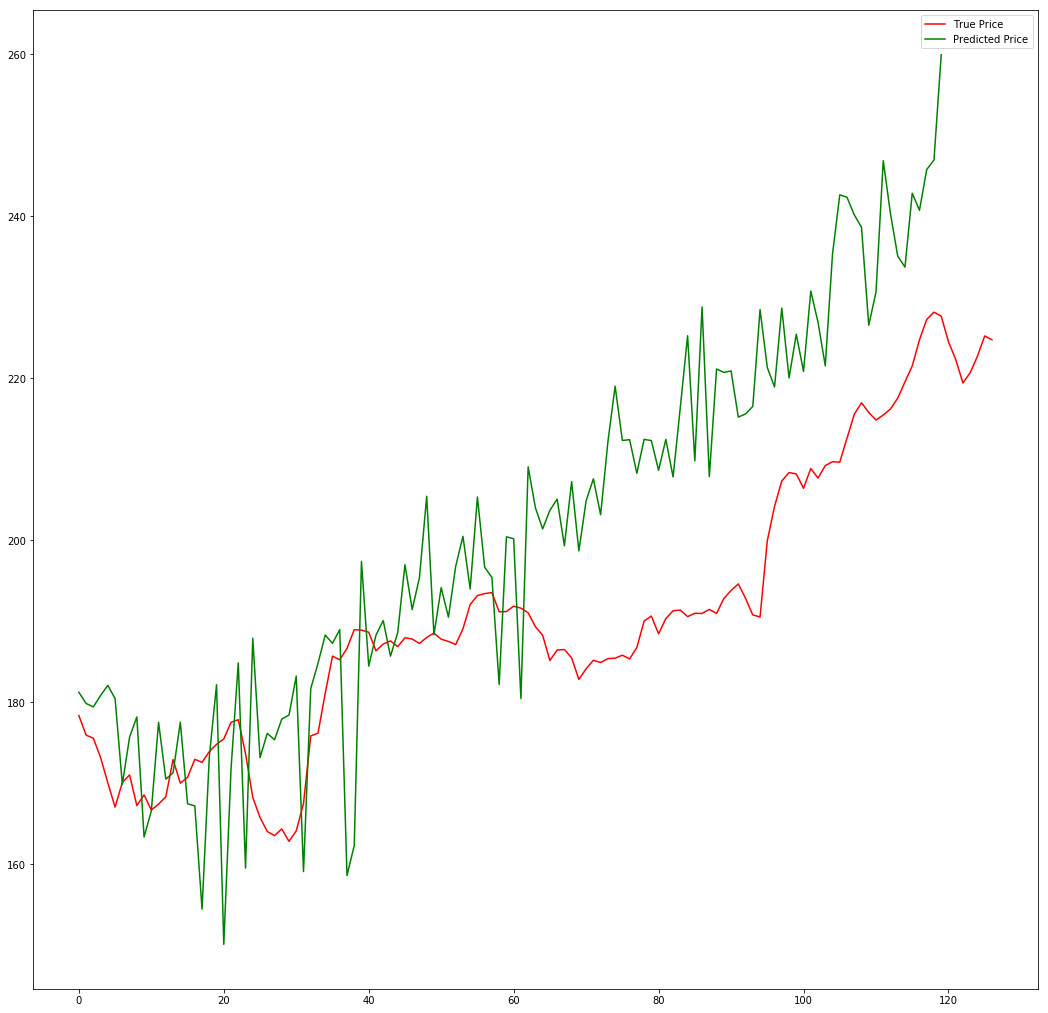

In [8]:
plt.figure(figsize = (18,18))
plt.plot(OHLC_mean[4400:], color = 'red', label = 'True Price')
plt.plot(four_month_predictions, color = 'green', label = 'Predicted Price')
plt.legend()
plt.show()

In [11]:
true_values = OHLC_mean[4400:4520]
counter = 0;
for i in range(len(true_values)-1):
    if true_values[i+1] > true_values[i] and four_month_predictions[i+1] > four_month_predictions[i]:
        counter = counter + 1
    elif true_values[i+1] < true_values[i] and four_month_predictions[i+1] < four_month_predictions[i]:
        counter = counter + 1
print (counter)

55


In [12]:
three_day_interval = []
for i in range (len(true_values)-1):
    if i % 3 == 0:
        three_day_interval.append(true_values[i])
        
three_day_predictions = []
for i in range (len(four_month_predictions)-1):
    if i % 3 == 0:
        three_day_predictions.append(four_month_predictions[i])
        
counter = 0;
for i in range(len(three_day_predictions)-1):
    if three_day_interval[i+1] > three_day_interval[i] and  three_day_predictions[i+1] >  three_day_predictions[i]:
        counter = counter + 1
    elif three_day_interval[i+1] < three_day_interval[i] and  three_day_predictions[i+1] < three_day_predictions[i]:
        counter = counter + 1
print (counter)

26


In [5]:
four_month_predictions = [181.2321279761505, 179.84181715958357, 179.4219634187629, 180.8343174066293, 182.08253747865098, 180.43798907379633, 169.8567365084965, 175.69393417030997, 178.17809486729388, 163.35470809725072, 166.57163765829492, 177.51520870360852, 170.50520826035122, 171.27466588207096, 177.52897038735625, 167.46244830942626, 167.19323877073714, 154.4563245146722, 173.2354338460849, 182.1556702209387, 150.11036574924333, 171.78724780616793, 184.84919345051125, 159.5290280078963, 187.8953122313628, 173.16186595174193, 176.15436584028396, 175.35489632525278, 177.9085045705564, 178.41065644382877, 183.22467563870046, 159.08790621037465, 181.68219758780853, 184.7998308892423, 188.28568442043937, 187.27031149348883, 188.9629306019484, 158.60212693318155, 162.29651348836194, 197.3607533359566, 184.45633273561864, 188.27582550668728, 190.07599516530556, 185.6792867914316, 188.5854361940073, 196.97118345848193, 191.4259456287468, 195.38370796537544, 205.42142841664767, 188.32645272861686, 194.1487600310393, 190.49722235480064, 196.76653960599253, 200.4753405730035, 193.98181122533708, 205.32961133298707, 196.65781958468529, 195.3992646513511, 182.18629404682787, 200.41403852721825, 200.17422894926287, 180.45574871705176, 209.05626713276556, 204.00556601533572, 201.3904245497175, 203.68685793036036, 205.06509327739374, 199.30989458099398, 207.22687429393602, 198.66857564104765, 204.86696310723158, 207.5676799442177, 203.1380903931679, 212.0991630687078, 219.007909068106, 212.30841681328266, 212.40837939947772, 208.25969409860224, 212.4473255084238, 212.29181304267402, 208.63297297100797, 212.43822811076845, 207.7994392091507, 216.42702222833805, 225.23701554969117, 209.7936322904096, 228.7943020104601, 207.8508959396856, 221.13119272625914, 220.71669679511893, 220.8881739018962, 215.19662979208044, 215.58328959018556, 216.5144741929443, 228.4663605428121, 221.315194053127, 218.9142289897088, 228.65013069515058, 220.02072547673183, 225.42097608105382, 220.82817731227675, 230.74704685845512, 226.90053386445499, 221.52433900968802, 235.33044906253886, 242.63211017083654, 242.3272045651141, 240.16496119951313, 238.62759618527056, 226.53693712527885, 230.61250328236835, 246.84582350697048, 240.2892787023012, 235.06299373057254, 233.70757666943703, 242.82972359793308, 240.72369643847148, 245.751252905962, 246.92708815329092, 259.91806321712113]
four_month_predictions

[181.2321279761505,
 179.84181715958357,
 179.4219634187629,
 180.8343174066293,
 182.08253747865098,
 180.43798907379633,
 169.8567365084965,
 175.69393417030997,
 178.17809486729388,
 163.35470809725072,
 166.57163765829492,
 177.51520870360852,
 170.50520826035122,
 171.27466588207096,
 177.52897038735625,
 167.46244830942626,
 167.19323877073714,
 154.4563245146722,
 173.2354338460849,
 182.1556702209387,
 150.11036574924333,
 171.78724780616793,
 184.84919345051125,
 159.5290280078963,
 187.8953122313628,
 173.16186595174193,
 176.15436584028396,
 175.35489632525278,
 177.9085045705564,
 178.41065644382877,
 183.22467563870046,
 159.08790621037465,
 181.68219758780853,
 184.7998308892423,
 188.28568442043937,
 187.27031149348883,
 188.9629306019484,
 158.60212693318155,
 162.29651348836194,
 197.3607533359566,
 184.45633273561864,
 188.27582550668728,
 190.07599516530556,
 185.6792867914316,
 188.5854361940073,
 196.97118345848193,
 191.4259456287468,
 195.38370796537544,
 205.421

In [10]:
true_values = OHLC_mean[4400:4520]
print(true_values)

[178.352497   175.93750375 175.55500375 173.164997   170.03250125
 167.04750025 170.09500475 171.02249525 167.2350005  168.55999775
 166.68249875 167.41500075 168.31750125 172.92250075 170.00749975
 170.7175025  172.94499975 172.57249825 173.897499   174.79999925
 175.4675025  177.520004   177.8375015  173.65250025 168.24250025
 165.77000025 164.04000075 163.52499775 164.35999675 162.8200035
 164.12249775 167.49500275 175.8375015  176.1775015  181.125
 185.68999875 185.23250175 186.63249975 188.94999675 188.897499
 188.63749725 186.3475035  187.17750175 187.5650025  186.86000075
 187.95250325 187.80000325 187.2425005  187.99250025 188.5274965
 187.77999875 187.5        187.11499775 189.06000125 192.06000125
 193.170002   193.40250025 193.53499975 191.15999975 191.1900025
 191.85749825 191.6100005  191.0350035  189.3224985  188.260002
 185.1525     186.44499975 186.50000375 185.472496   182.8049965
 184.1224975  185.1749995  184.902504   185.375      185.43000025
 185.79999525 185.33749

In [11]:
profit = 0
for i in range (len(true_values)-1):
    if four_month_predictions[i+1] > four_month_predictions[i]:
        profit = profit + true_values[i+1] - true_values[i]
print (profit)

16.950011499999817


In [13]:
three_day_interval = []
for i in range (len(true_values)-1):
    if i %  3 == 0:
        three_day_interval.append(true_values[i])
        
three_day_predictions = []
for i in range (len(four_month_predictions)-1):
    if i % 3 == 0:
        three_day_predictions.append(four_month_predictions[i])
        
counter = 0;
for i in range(len(three_day_predictions)-1):
    if three_day_interval[i+1] > three_day_interval[i] and  three_day_predictions[i+1] >  three_day_predictions[i]:
        counter = counter + 1
    elif three_day_interval[i+1]< three_day_interval[i] and  three_day_predictions[i+1] < three_day_predictions[i]:
        counter = counter + 1
print (counter)

26


In [14]:
profit = 0
for i in range (len(three_day_predictions)-1):
    if three_day_predictions[i+1] > three_day_predictions[i]:
        profit = profit + three_day_interval[i+1] - three_day_interval[i]
print (profit)

53.64250499999994
